# Connections Visualization

In [9]:
#@title Pairwise distances
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
  fig, ax = plt.subplots(figsize=(4, 1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
  fig.savefig('hello.png')
  plt.close(fig)
  from matplotlib.image import imread
  data = imread('hello.png')[::-1, :, 0].T
  rng = np.random.RandomState(rseed)
  X = rng.rand(4 * N, 2)
  i, j = (X * data.shape).astype(int).T
  mask = (data[i, j] < 1)
  X = X[mask]
  X[:, 0] *= (data.shape[0] / data.shape[1])
  X = X[:N]
  return X[np.argsort(X[:, 0])]

X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

import numpy as np

def make_hello_s_curve(X):
  t = (X[:, 0] - 2) * 0.75 * np.pi
  x = np.sin(t)
  y = X[:, 1]
  z = np.sign(t) * (np.cos(t) - 1)
  return np.vstack((x, y, z)).T
XS = make_hello_s_curve(X)

from plotly.subplots import make_subplots
import plotly.graph_objects as go
colors = ['rgb(' + np.array2string(c[:-1], formatter={'float_kind':lambda x:  "%.0f" % (x * 255)}, separator=',')[1:-1] + ')' for c in colorize['cmap'](0.255*colorize['c'])]

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=XS[:, 0], y=XS[:, 1], z=XS[:, 2],
                           mode='markers', name='datapoints (LEFT)',
                           marker=dict(size=5, opacity=0.8, color=colors)
                           ), row=1, col=1)
fig.add_trace(go.Scatter3d(x=XS[:, 0], y=XS[:, 1], z=XS[:, 2],
                           mode='markers', name='datapoints (RIGHT)',
                           marker=dict(size=5, opacity=0.8, color=colors)
                           ), row=1, col=2)

from sklearn.neighbors import NearestNeighbors

N_neighbours = 100

rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
nbrs = NearestNeighbors(n_neighbors=N_neighbours, radius=100.0).fit(XS).kneighbors(XS[ind[:100]])[1]
lines_LLE = []
for i in range(100):
  for j in nbrs[i]:
    lines_LLE = lines_LLE + [XS[ind[i]], XS[j], np.array([None, None, None])]
lines_LLE = np.array(lines_LLE)

fig.add_trace(go.Scatter3d(
    x=lines_LLE[:, 0], y=lines_LLE[:, 1], z=lines_LLE[:, 2],
    mode='lines', opacity=0.2,
    line={'color': 'rgb(0,0,0)', 'width': 1},
    name='LLE connections'
), row=1, col=1)

lines_MDS = []
for i in ind[:100]:
  for j in ind[100:200]:
    lines_MDS = lines_MDS + [XS[i], XS[j], np.array([None, None, None])]
lines_MDS = np.array(lines_MDS)

fig.add_trace(go.Scatter3d(
    x=lines_MDS[:, 0], y=lines_MDS[:, 1], z=lines_MDS[:, 2],
    mode='lines', opacity=0.1,
    line={'color': 'rgb(0,0,0)', 'width': 1},
    name='MDS connections'
), row=1, col=2)

fig.show()

# Sklearn manifold learning methods

Используйте следующий пример, чтобы получить представление о том, как работает многообразное обучение.
* Попробуйте разные параметры для MDS и Isomap. Обратите внимание, что `n_neighbours` **значительно** меняет результат. Попробуйте разные значения, чтобы увидеть эффект
* Реализуйте свою собственную поверхность, изменив функцию `custom(X)`. В качестве примера приведена рулетка.

In [10]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

def linear_embedding(datapoints):
  model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
  return model.fit_transform(datapoints)

def multidim_scaling(datapoints):
  model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
  D = pairwise_distances(X)
  return model.fit_transform(D)

from sklearn.manifold import Isomap
def isomap(datapoints):
  model = Isomap(n_components = 2, n_neighbors=200)
  return model.fit_transform(datapoints)


def custom(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  helicoid = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[0]] for p in params])
  return helicoid

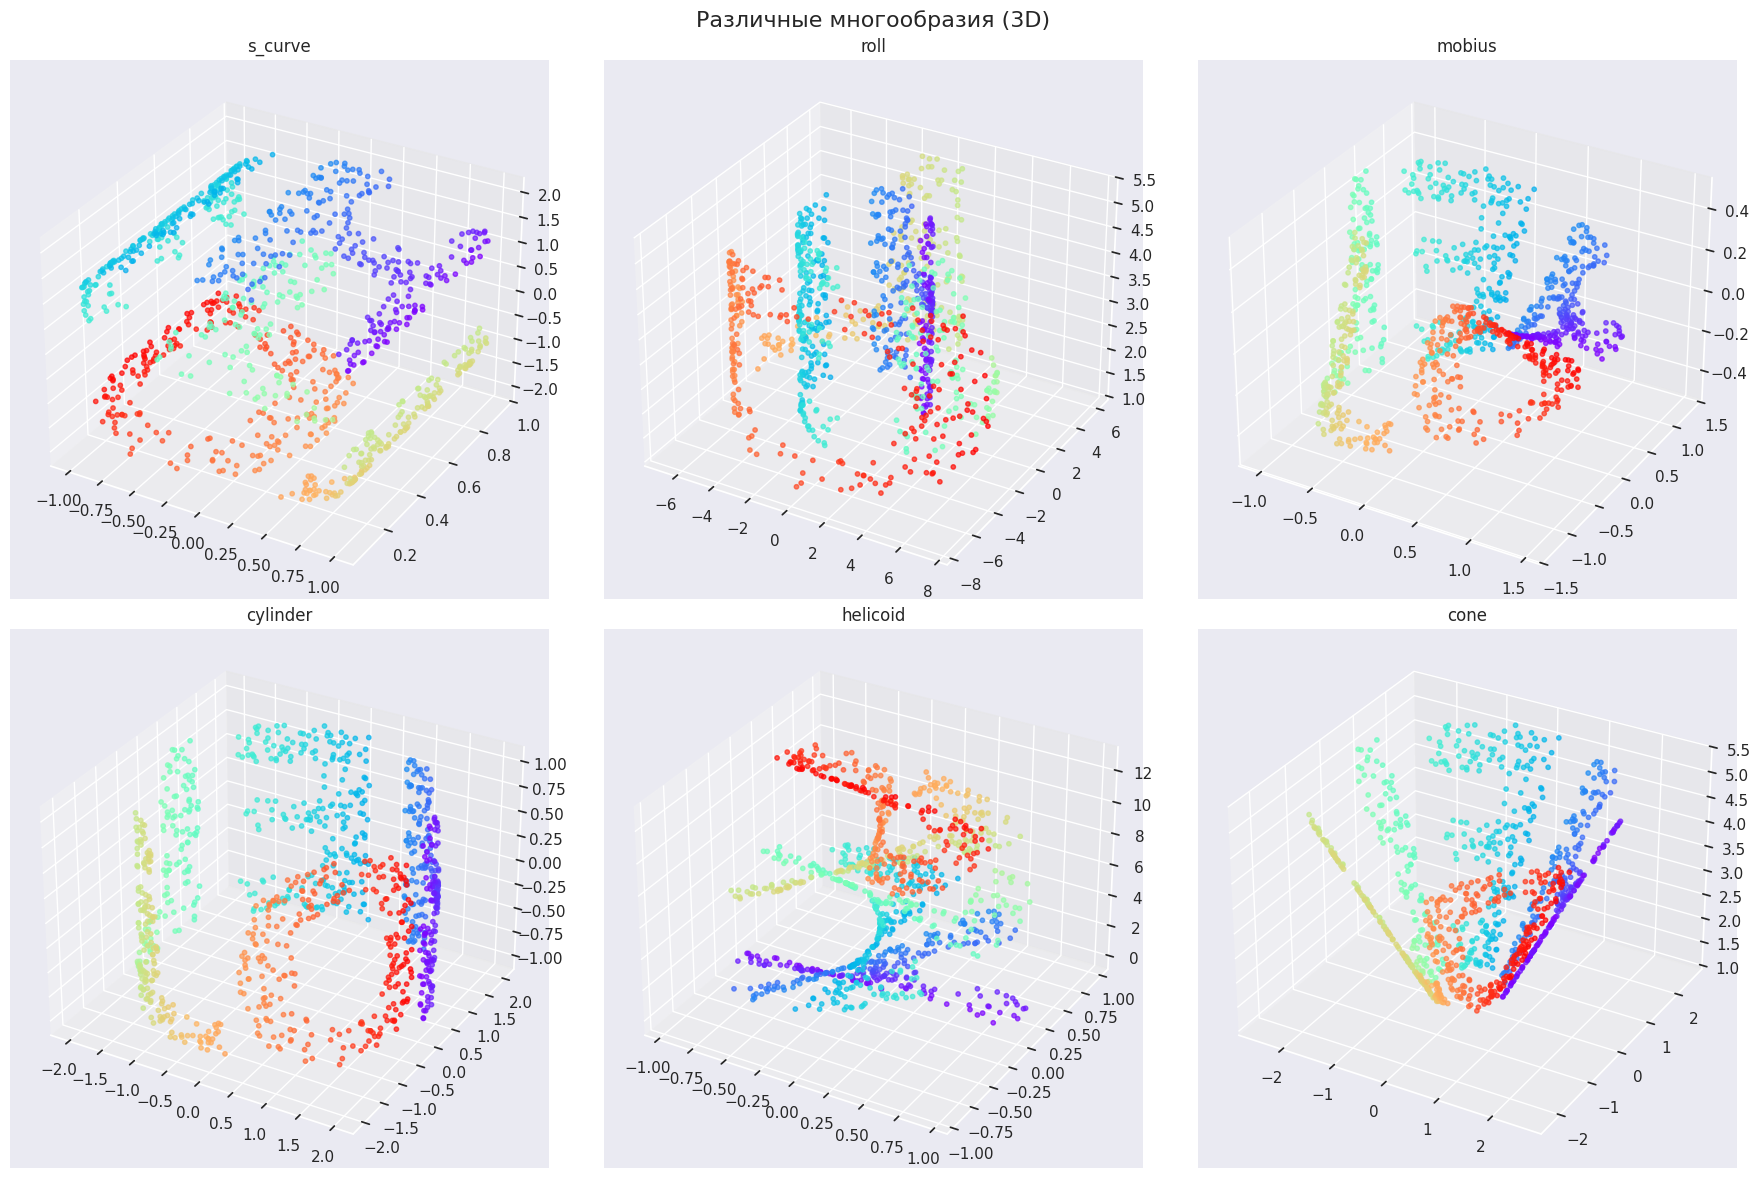

Разворачивание S-кривой разными методами...


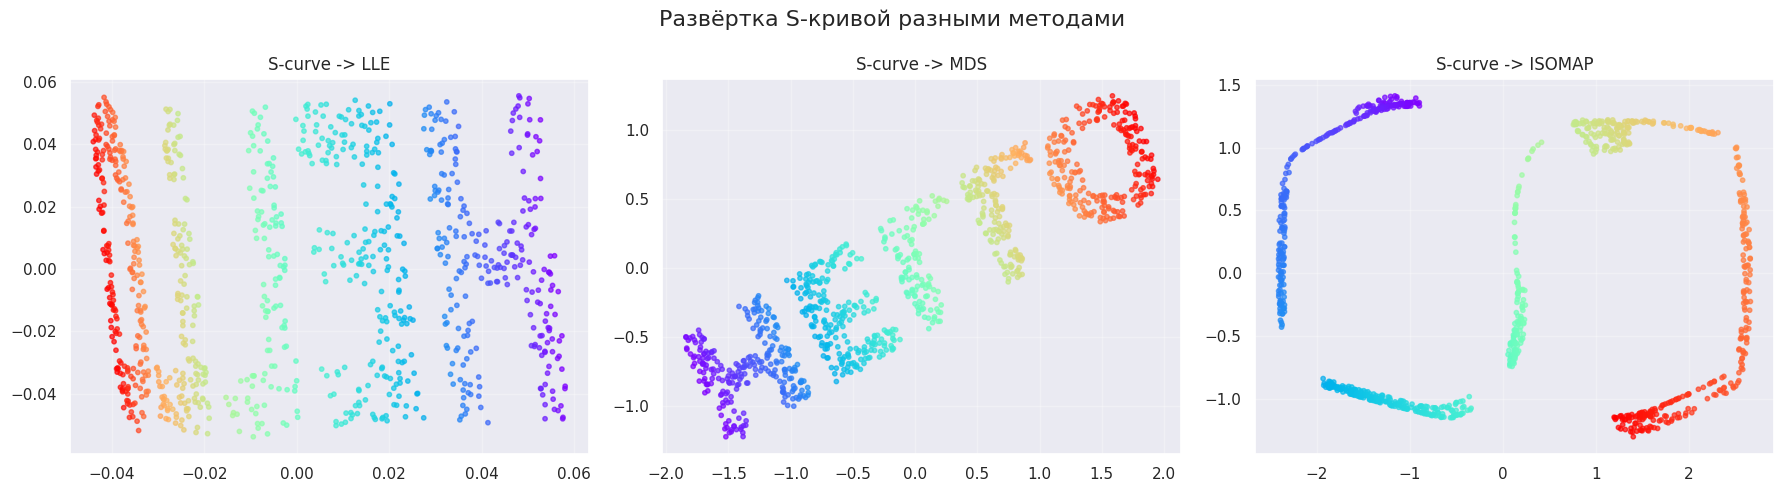

In [11]:
#@title Explore manifold learning
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns

def make_hello(N=1000, rseed=42):
  import seaborn as sns; sns.set();
  fig, ax = plt.subplots(figsize=(4, 1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
  fig.savefig('hello.png')
  plt.close(fig)
  from matplotlib.image import imread
  data = imread('hello.png')[::-1, :, 0].T
  rng = np.random.RandomState(rseed)
  X = rng.rand(4 * N, 2)
  i, j = (X * data.shape).astype(int).T
  mask = (data[i, j] < 1)
  X = X[mask]
  X[:, 0] *= (data.shape[0] / data.shape[1])
  X = X[:N]
  return X[np.argsort(X[:, 0])]

X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
colors = ['rgb(' + np.array2string(c[:-1], formatter={'float_kind':lambda x:  "%.0f" % (x * 255)}, separator=',')[1:-1] + ')' for c in colorize['cmap'](0.255*colorize['c'])]


def unwind_manifold(datapoints, method):
  methods = {'lle': linear_embedding, 'mds': multidim_scaling, 'isomap': isomap}
  return methods[method](datapoints)

def roll(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.2)
  b_y = b_x - 0.2
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  roulette = np.array([[(2 + p[0]) * np.cos(2 * p[0]), (2 + p[0]) * np.sin(2 * p[0]), 2.0 * p[1]] for p in params])
  return roulette

def s_curve(X):
  t = (X[:, 0] - 2) * 0.75 * np.pi
  x = np.sin(t)
  y = X[:, 1]
  z = np.sign(t) * (np.cos(t) - 1)
  return np.vstack((x, y, z)).T

def plane(X):
  p = np.array([[x[0], x[1], x[0] + x[1]] for x in X])
  return p

def mobius(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.1)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  mobius = np.array([[(1.0 + p[1]/2.0 * np.cos(p[0]/2)) * np.cos(p[0]), (1.0 + p[1]/2.0 * np.cos(p[0]/2)) * np.sin(p[0]), p[1]/2.0 * np.sin(p[0]/2)] for p in params])
  return mobius

def cylinder(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.1)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  cylinder = np.array([[2.0 * np.cos(p[0]), 2.0 * np.sin(p[0]), p[1]] for p in params])
  return cylinder

def helicoid(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  helicoid = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[0]] for p in params])
  return helicoid

def cone(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.2)
  b_y = b_x - 0.2
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  cone = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[1]] for p in params])
  return cone

def transform_to_3d(x, manifold):
  funcs = {'s_curve': s_curve, 'mobius': mobius, 'cylinder': cylinder,
           'helicoid': helicoid, 'cone': cone, 'custom': custom, 'plane': plane,
           'roll': roll}
  return funcs[manifold](x)

# Демонстрация различных многообразий
manifolds = ['s_curve', 'roll', 'mobius', 'cylinder', 'helicoid', 'cone']
methods = ['isomap']

fig_3d = plt.figure(figsize=(18, 12))
for i, man_name in enumerate(manifolds):
    man_3d = transform_to_3d(X, man_name)
    ax = fig_3d.add_subplot(2, 3, i+1, projection='3d')
    ax.scatter(man_3d[:, 0], man_3d[:, 1], man_3d[:, 2], c=X[:, 0], cmap='rainbow', s=10, alpha=0.7)
    ax.set_title(man_name)
plt.suptitle('Различные многообразия (3D)', fontsize=16)
plt.tight_layout()
plt.show()

# Разворачивание S-кривой разными методами
print('Разворачивание S-кривой разными методами...')
man_s = transform_to_3d(X, 's_curve')
fig_unw, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, method in enumerate(['lle', 'mds', 'isomap']):
    unw = unwind_manifold(man_s, method)
    axes[i].scatter(unw[:, 0], unw[:, 1], c=X[:, 0], cmap='rainbow', s=10, alpha=0.7)
    axes[i].set_title(f'S-curve -> {method.upper()}')
    axes[i].grid(True, alpha=0.3)
plt.suptitle('Развёртка S-кривой разными методами', fontsize=16)
plt.tight_layout()
plt.show()

# Применение к датасету Dry Bean

* Загружаем датасет Dry Bean и стандартизируем признаки

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Dry_Bean_Dataset.csv')
print(f"Размер: {df.shape}")
print(f"Классы: {df['Class'].unique()}")

feature_names = [col for col in df.columns if col != 'Class']
X_raw = df[feature_names].values
target_names = df['Class'].values

# Числовые метки
class_names = sorted(df['Class'].unique())
class_to_idx = {name: idx for idx, name in enumerate(class_names)}
target = np.array([class_to_idx[c] for c in target_names])

# Стандартизация
scaler = StandardScaler()
data = scaler.fit_transform(X_raw)

print(f"data shape: {data.shape}, target shape: {target.shape}")

Размер: (13611, 17)
Классы: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
data shape: (13611, 16), target shape: (13611,)


* Выполните следующие функции, чтобы уменьшить размеры `данных` до 3. Ожидается, что результат будет иметь вид `(n_samples, 3)`.

In [13]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

def projected_mds(data):
  return MDS(n_components=3, random_state=42).fit_transform(data)

def projected_isomap(data):
  return Isomap(n_components=3, n_neighbors=20).fit_transform(data)

def projected_PCA(data):
  return PCA(n_components=3, random_state=42).fit_transform(data)

* Запустите код визуализации, чтобы увидеть результат.

> **Примечание:** MDS на полном датасете Dry Bean (13611 образцов) работает очень долго, поэтому для визуализации используем подвыборку и сравниваем Isomap и PCA.

In [14]:
#@title Visualization
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Цвета по классам
cmap_beans = {
    0: 'rgba(31,119,180,255)',
    1: 'rgba(255,127,14,255)',
    2: 'rgba(44,160,44,255)',
    3: 'rgba(214,39,40,255)',
    4: 'rgba(148,103,189,255)',
    5: 'rgba(140,86,75,255)',
    6: 'rgba(227,119,194,255)',
}
colors_beans = [cmap_beans[int(d)] for d in target]

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "scene"}]])

iso_proj = projected_isomap(data)
fig.add_trace(go.Scatter3d(x=iso_proj[:, 0], y=iso_proj[:, 1], z=iso_proj[:, 2],
                           mode='markers',
                           marker=dict(size=3, color=colors_beans, opacity=0.6)),
              row=1, col=1)

pca_proj = projected_PCA(data)
fig.add_trace(go.Scatter3d(x=pca_proj[:, 0], y=pca_proj[:, 1], z=pca_proj[:, 2],
                           mode='markers',
                           marker=dict(size=3, color=colors_beans, opacity=0.6)),
              row=1, col=2)

fig.update_layout(width=1200, height=600, autosize=False,
                  title_text="3-component Isomap (left) and PCA (right) for Dry Bean",
                  scene={"xaxis": {"title": "component 1"},
                         "yaxis": {"title": "component 2"},
                         "zaxis": {"title": "component 3"}},
                  showlegend=False)

fig.show()

* Разделить набор данных на train и test
* Создать модели:
   - любой классификатор (простой)
   - PCA + любой классификатор
   - MDS + любой классификатор  
   - Isomap + любой классификатор
* Обучить модели
* Выполнить классификацию

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, shuffle=True, random_state=42)

logreg = LogisticRegression(max_iter=1000)

# 1. Простая модель без понижения размерности
l_simple = LogisticRegression(max_iter=1000).fit(X_train, y_train).predict(X_test)

# 2. MDS + LogisticRegression
np.random.seed(42)
sample_size = 2000
train_idx = np.random.choice(len(X_train), sample_size, replace=False)
test_idx = np.random.choice(len(X_test), sample_size, replace=False)
mds = MDS(n_components=3, random_state=42)
X_train_mds = mds.fit_transform(X_train[train_idx])
X_test_mds = mds.fit_transform(X_test[test_idx])
l_MDS_sub = LogisticRegression(max_iter=1000).fit(X_train_mds, y_train[train_idx]).predict(X_test_mds)

# 3. Isomap + LogisticRegression
isomap_model = Isomap(n_components=3, n_neighbors=15)
X_train_iso = isomap_model.fit_transform(X_train)
X_test_iso = isomap_model.transform(X_test)
l_isomap = LogisticRegression(max_iter=1000).fit(X_train_iso, y_train).predict(X_test_iso)

# 4. PCA + LogisticRegression
pca_model = PCA(n_components=3, random_state=42)
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)
l_pca = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train).predict(X_test_pca)

def get_results():
  return y_test, ['Simple model', 'isomap', 'pca'], [l_simple, l_isomap, l_pca]

def get_results_mds():
  return y_test[test_idx], ['MDS (subsample)'], [l_MDS_sub]

print('Классификация завершена.')

Классификация завершена.


* Запустите код визуализации, чтобы увидеть матрицы путаницы.

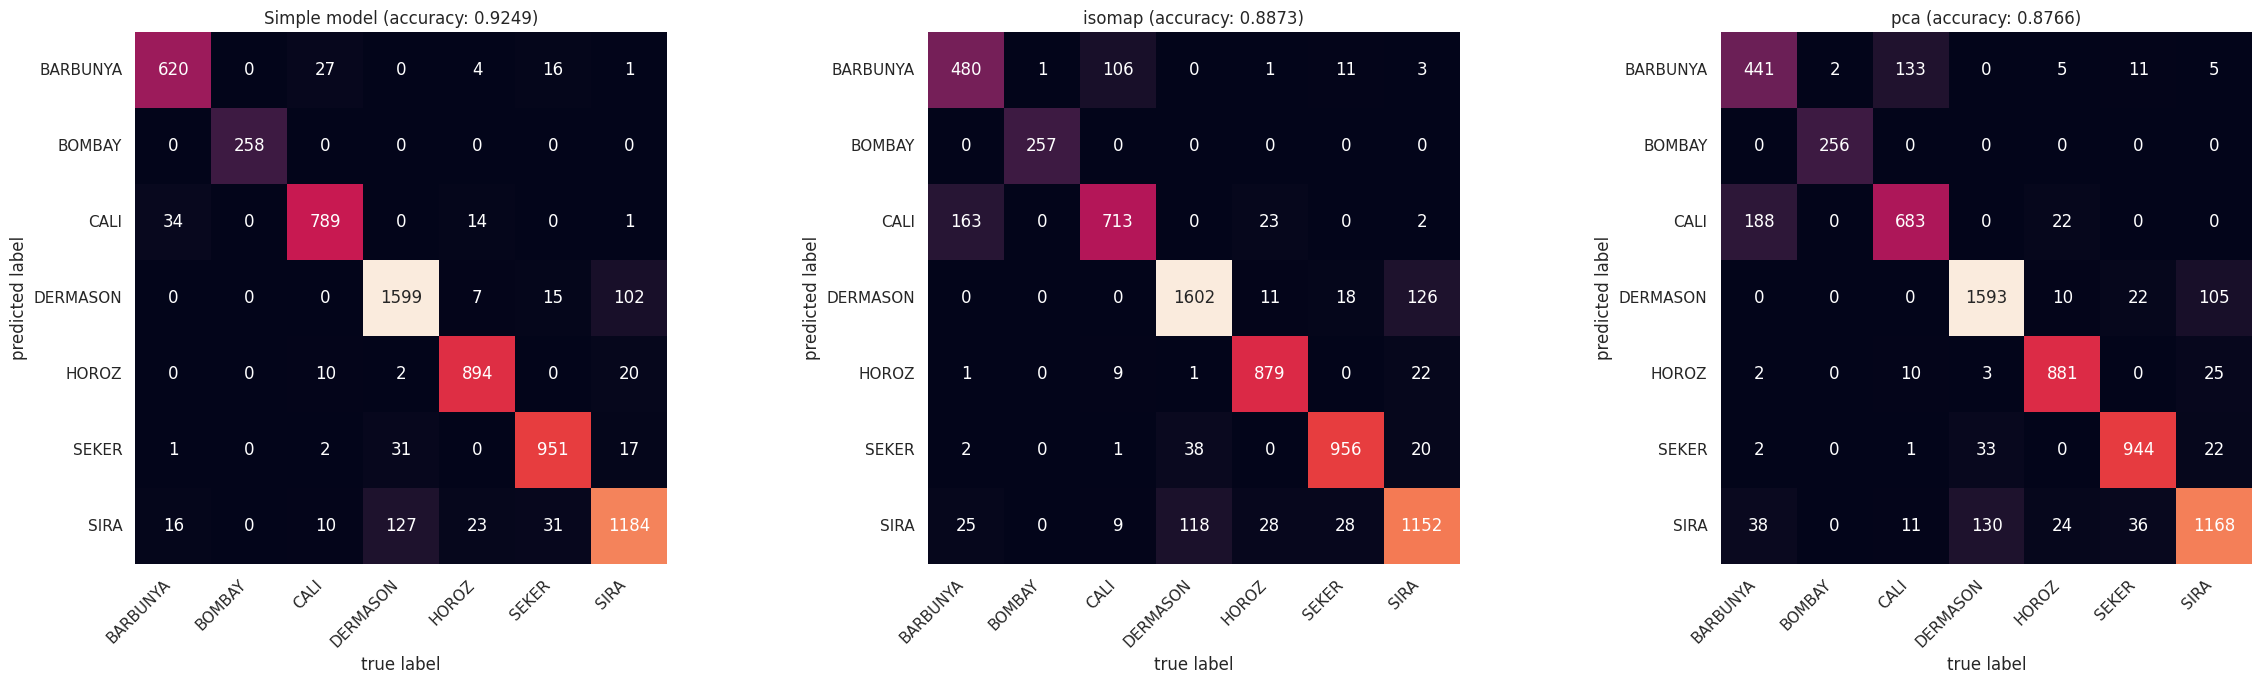

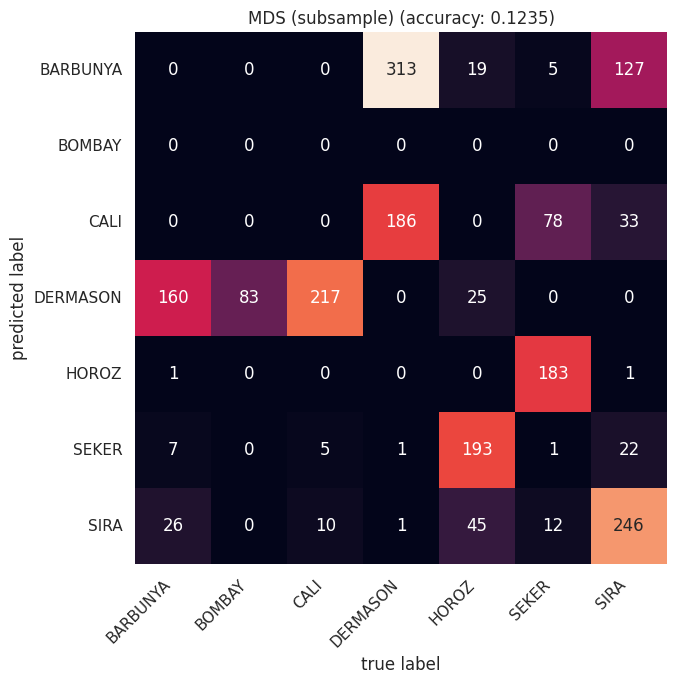

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

trg, names, labels = get_results()
num_plots = len(names)
fig = plt.figure(figsize=(8 * num_plots, 7))

for idx in range(num_plots):
  plt.subplot(1, num_plots, 1 + idx)
  mat = confusion_matrix(trg, labels[idx])
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
  plt.ylim(len(class_names), 0.0)
  plt.xlabel('true label')
  plt.ylabel('predicted label')
  plt.title(names[idx] + " (accuracy: " + str(round(accuracy_score(trg, labels[idx]), 4)) + ")")
  plt.xticks(rotation=45, ha='right')
  plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Отдельно для MDS на подвыборке
trg_mds, names_mds, labels_mds = get_results_mds()
fig2 = plt.figure(figsize=(8, 7))
mat = confusion_matrix(trg_mds, labels_mds[0])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=class_names,
          yticklabels=class_names)
plt.ylim(len(class_names), 0.0)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(names_mds[0] + " (accuracy: " + str(round(accuracy_score(trg_mds, labels_mds[0]), 4)) + ")")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Выводы

Классификатор без уменьшения размерности (все 16 признаков) показывает значительно более высокое качество предсказаний на тестовой выборке по сравнению с моделями, использующими понижение размерности до 3 компонент. Это ожидаемо, так как при сжатии до 3 компонент теряется значительная часть информации.